<a href="https://colab.research.google.com/github/arav7781/Data-Preprocessing/blob/main/FeatureAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.decomposition import PCA
from collections import Counter
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/crypto_dataset_for_rnn.csv")

In [ ]:

# Display basic information about the dataset
print("Data Shape:", df.shape)
print(df.info())
print(df.describe())

# Sampling a smaller subset (100,000 rows) for faster analysis and visualization
sampled_data = df.sample(n=100000, random_state=42)


Data Shape: (2000000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Algorithm            object 
 1   Key                  object 
 2   IV                   object 
 3   Plaintext            object 
 4   Ciphertext           object 
 5   Ciphertext_Entropy   float64
 6   Hamming_Distance     int64  
 7   Ciphertext_Mean      float64
 8   Ciphertext_Variance  float64
 9   Key_Sequence         object 
 10  IV_Sequence          object 
 11  Plaintext_Sequence   object 
 12  Ciphertext_Sequence  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 198.4+ MB
None
       Ciphertext_Entropy  Hamming_Distance  Ciphertext_Mean  \
count        2.000000e+06      2.000000e+06     2.000000e+06   
mean         4.454564e+00      6.398956e+01     1.274938e+02   
std          3.450041e-01      5.655450e+00     1.553043e+01   
min          3.149397e+00 

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Calculate summary statistics
summary_stats = data.describe()
print(summary_stats)


Missing Values:
 IV    499901
dtype: int64
       Ciphertext_Entropy  Hamming_Distance  Ciphertext_Mean  \
count        2.000000e+06      2.000000e+06     2.000000e+06   
mean         4.454564e+00      6.398956e+01     1.274938e+02   
std          3.450041e-01      5.655450e+00     1.553043e+01   
min          3.149397e+00      3.700000e+01     5.050000e+01   
25%          4.053509e+00      6.000000e+01     1.171667e+02   
50%          4.501629e+00      6.400000e+01     1.275000e+02   
75%          4.601410e+00      6.800000e+01     1.378333e+02   
max          5.000000e+00      9.300000e+01     2.072500e+02   

       Ciphertext_Variance    Key_Length     IV_Length  Plaintext_Length  
count         2.000000e+06  2.000000e+06  2.000000e+06         2000000.0  
mean          5.218606e+03  1.599220e+01  8.003676e+00              16.0  
std           1.039908e+03  5.654811e+00  5.658893e+00               0.0  
min           6.843125e+02  8.000000e+00  0.000000e+00              16.0  
25%  

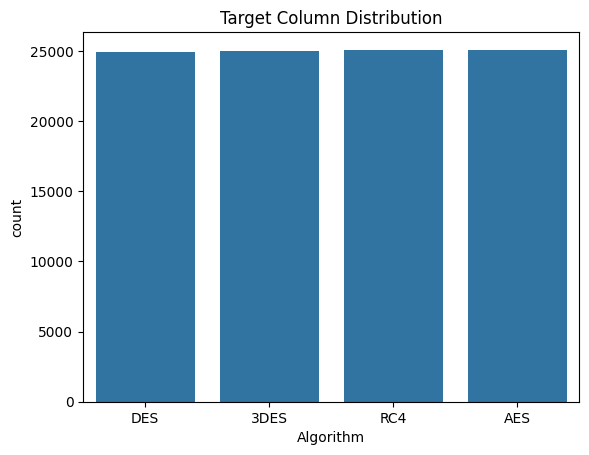

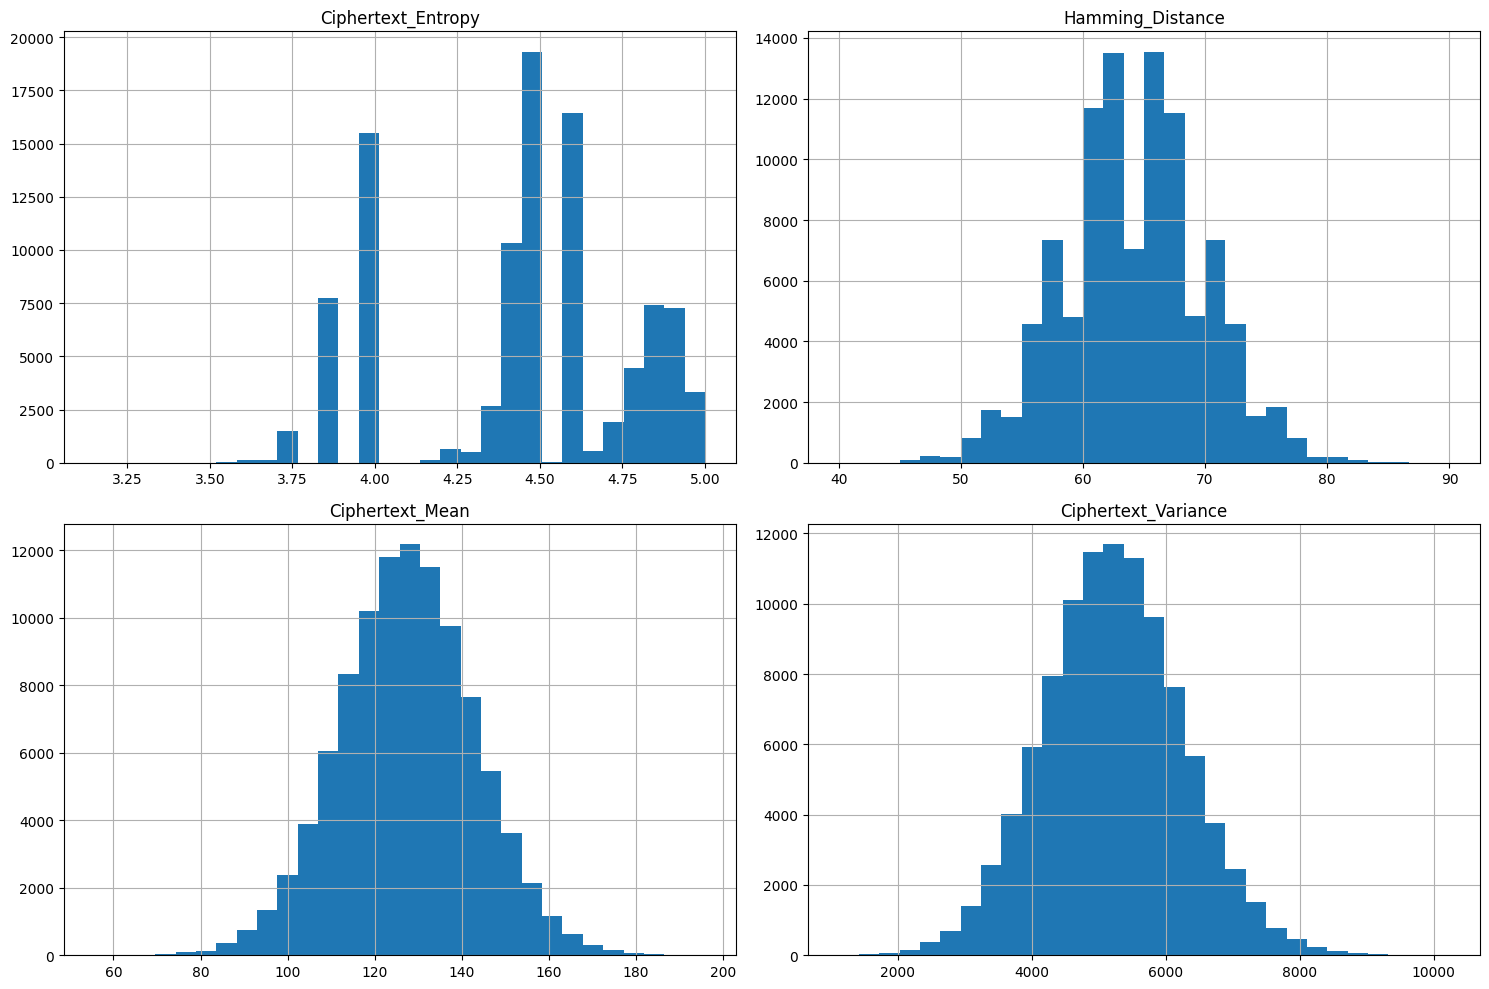

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (adjust 'target_column' to your dataset)
sns.countplot(x='Algorithm', data=sampled_data)
plt.title('Target Column Distribution')
plt.show()

# Distribution of numerical features
sampled_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Compute Z-scores for outlier detection
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))

# Set a threshold (e.g., 3) to identify outliers
outliers = np.where(z_scores > 3)

# Print the number of outliers
print("Number of outliers detected:", len(outliers[0]))


Number of outliers detected: 21196


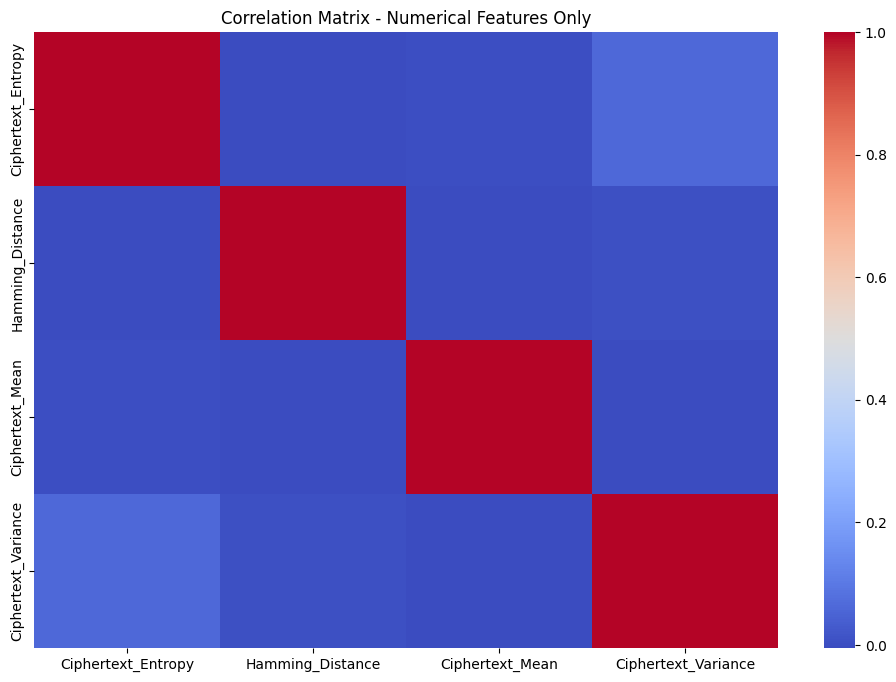

In [ ]:
# Exclude the 'Algorithm' column and select only numerical columns
numeric_columns = sampled_data.drop(columns=['Algorithm']).select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix on the selected numeric columns
correlation_matrix = sampled_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix - Numerical Features Only')
plt.show()
#Diagonal Values (Correlation with Self):

#The diagonal shows a perfect correlation (1.0) because each feature is perfectly correlated with itself.
#Off-Diagonal Values:

#The off-diagonal values show the correlation between different features. Values close to 1 or -1 indicate strong positive or negative correlations, respectively. Values close to 0 indicate little to no linear correlation.

In [ ]:
from sklearn.preprocessing import StandardScaler

 #Select the columns that need to be encoded (assuming 'Key', 'IV', etc., are strings)

numerical_columns = ['Ciphertext_Entropy', 'Hamming_Distance', 'Ciphertext_Mean', 'Ciphertext_Variance']  # Replace with your numerical columns

# Separate features and target
X = data[ numerical_columns]  # Combine categorical and numerical columns
y = data['Algorithm']  # Assuming 'Algorithm' is the target column

# Apply StandardScaler to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print(X_scaled_df.head())

   Ciphertext_Entropy  Hamming_Distance  Ciphertext_Mean  Ciphertext_Variance
0            0.136419          1.062769        -1.891050            -0.653340
1           -1.317561          0.532307        -0.450330            -1.531608
2            1.580956          0.709128         1.410935             0.384960
3            0.377962          0.355487        -0.541549             1.473339
4            0.377962         -1.412720        -0.447647            -1.553286


Explained variance by each component: [0.19625216 0.15134796 0.1250571  0.1250138  0.12493278 0.12397127
 0.09865106 0.05477388]
Total explained variance: 0.9999999999999999


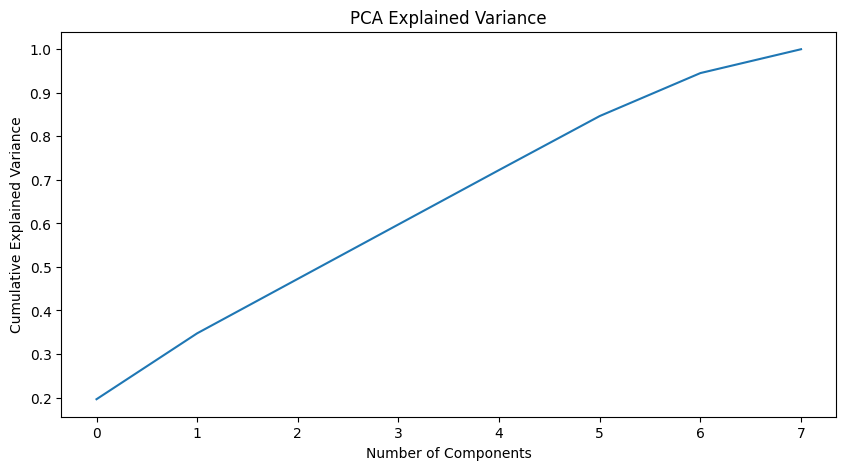

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {np.sum(explained_variance)}')

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


Feature Selection Graph

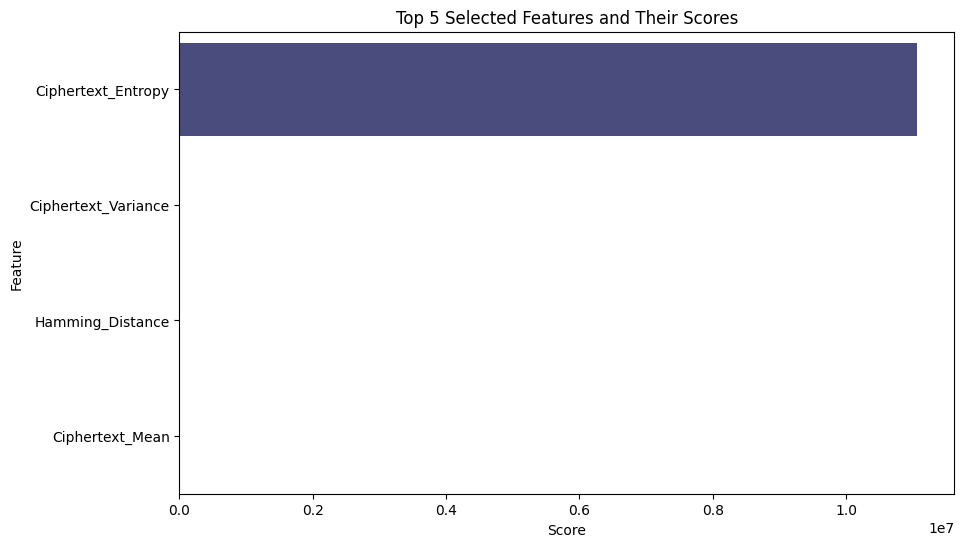

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Label encode the categorical columns
numerical_columns = ['Ciphertext_Entropy', 'Hamming_Distance', 'Ciphertext_Mean', 'Ciphertext_Variance']  # Replace with your numerical columns


# Combine features into a single DataFrame
X = data[numerical_columns]

# Scale the features
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled_df, y)

# Get the scores of the features
selected_scores = selector.scores_
selected_features = pd.DataFrame({'Feature': X.columns, 'Score': selected_scores})
selected_features = selected_features.sort_values(by='Score', ascending=False)

# Plot the scores of the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=selected_features.head(10), palette='viridis')
plt.title('Top 5 Selected Features and Their Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()


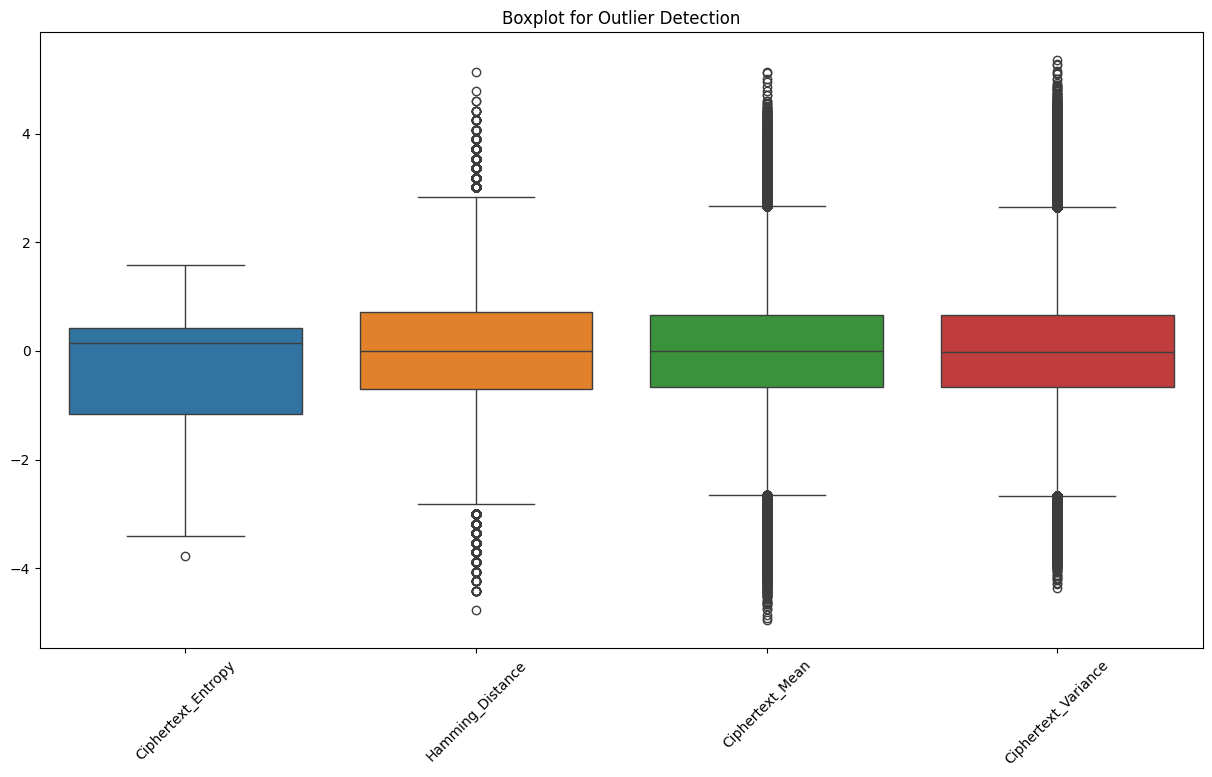

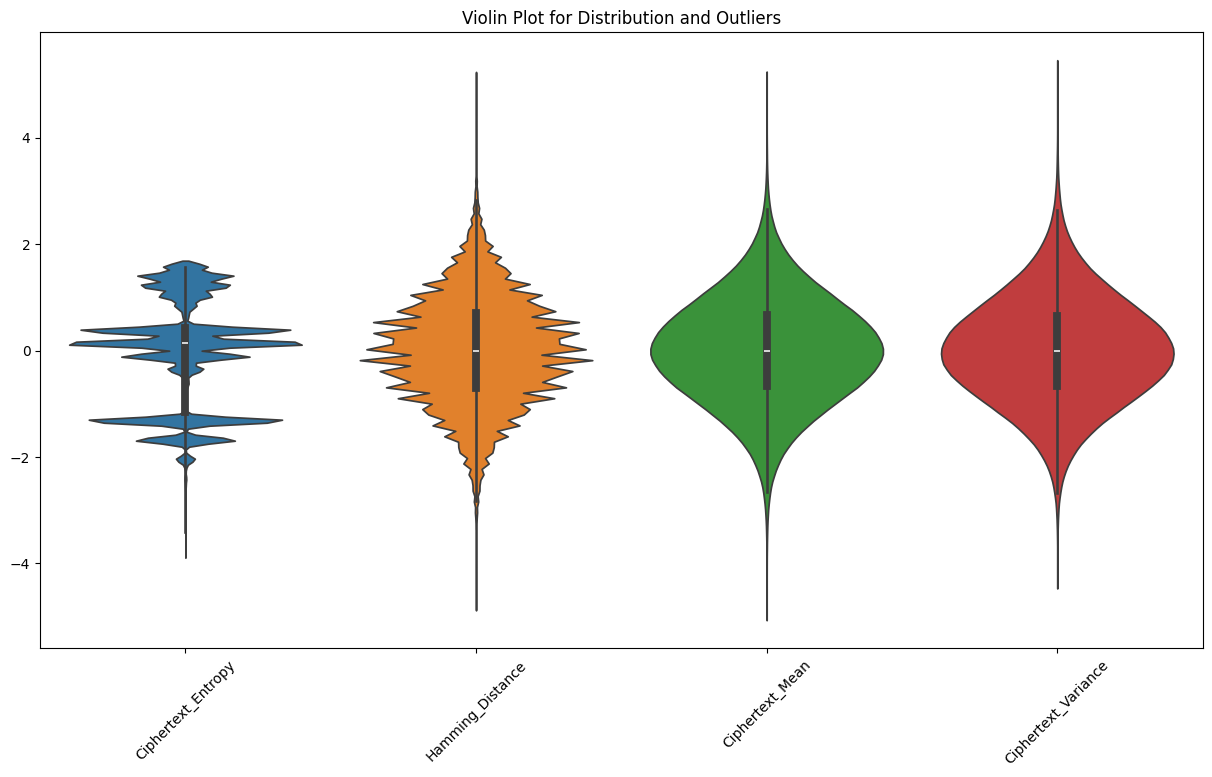

In [ ]:

# Assuming 'Algorithm' is the target column and rest are features
y = data['Algorithm']

# Label encode the categorical columns
numerical_columns = ['Ciphertext_Entropy', 'Hamming_Distance', 'Ciphertext_Mean', 'Ciphertext_Variance']  # Replace with your numerical columns
# Combine features into a single DataFrame
X = data[numerical_columns]

# Scale the features
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Boxplot for detecting outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_scaled_df)
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Violin plot for visualizing the distribution and outliers
plt.figure(figsize=(15, 8))
sns.violinplot(data=X_scaled_df, inner="box")
plt.title('Violin Plot for Distribution and Outliers')
plt.xticks(rotation=45)
plt.show()


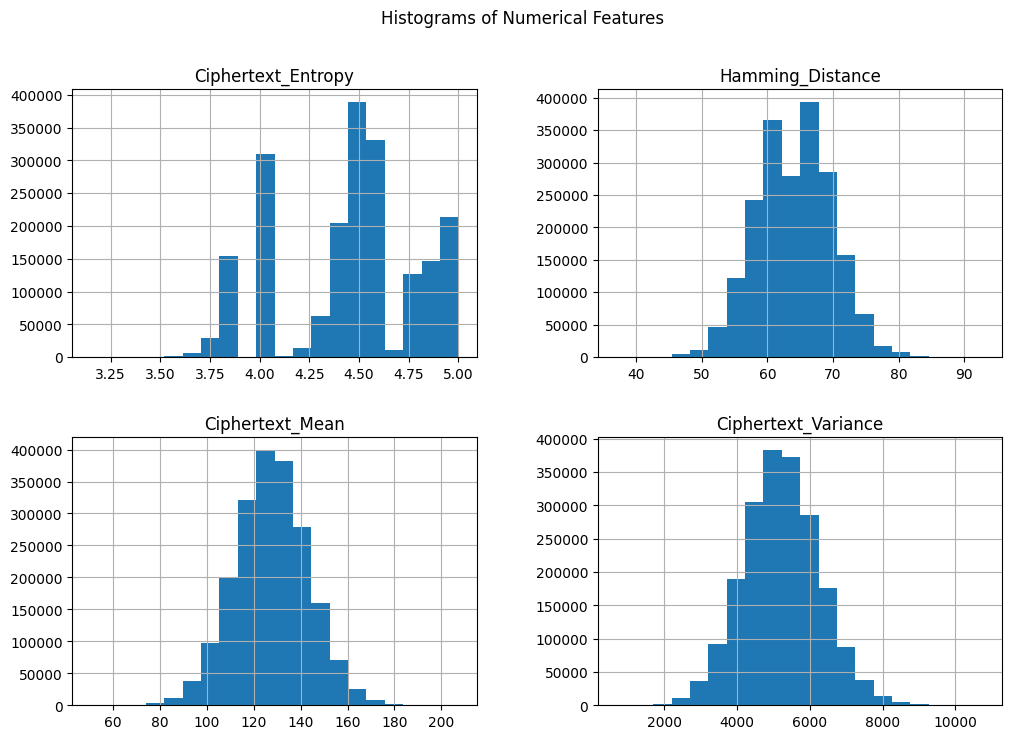

In [ ]:
data[['Ciphertext_Entropy', 'Hamming_Distance', 'Ciphertext_Mean', 'Ciphertext_Variance']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()


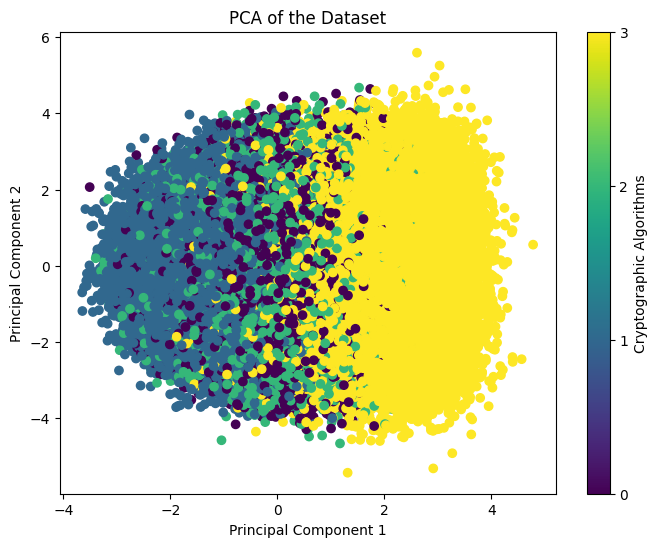

In [ ]:
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_df)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_numeric, cmap='viridis')
plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)), label='Cryptographic Algorithms')
plt.title('PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()